## ==========================================================================
## 📝 Tarea: Reducción de la Numerosidad con CNN, ENN y K-medias usando SVM
## 📊 Dataset: Breast Cancer (Scikit-Learn)
## 👤 Autor/a: Pablo Alejandro Aguirre Higuera
## 📅 Fecha: [17/11/2025]
## ==========================================================================

### 🔍 Descripción:
En este cuaderno aplicarás técnicas de reducción de la numerosidad (CNN, ENN, K-medias) al conjunto de datos Breast Cancer y analizarás su efecto en el rendimiento de un modelo SVM.

## ==========================================================================

### **1. Cargar Librerías Necesarias**
Escribe aquí la importación de librerías: numpy, pandas, matplotlib, seaborn, sklearn (datasets, model_selection, preprocessing, metrics, svm, kmeans), etc.

En el caso de los códigos de ENN, CNN, estos  deberás tomarlos del cuaderno que contiene la teoría y ejemplos.

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.utils.validation import check_X_y
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## ---------------------------------------------------------------------------------------------------------

### **2. Cargar y Explorar el Conjunto de Datos Breast Cancer**
- Cargar el dataset con sklearn.datasets.load_breast_cancer
- Explora las dimensiones, variables, y distribución de clases

In [133]:
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

df['target'] = cancer.target
df['class'] = df['target'].apply(lambda x: cancer.target_names[x])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


Se ha importado con éxito el dataset de *breast cancer*. Los datos se covierten inicialmente a un DataFrame con los valores de las variables predictoras (feature_names). Después se agrega la columna target, la variable objetivo. En lugar de representar la clase con unos y ceros, es mejor identificarlas con su etiqueta correspondiente. Para ello, se aplica una función lambda. Se usa la lista de valores de target [0,1] y la etiquetas ['malignant', 'benign']. En este caso, 0 implica una observación con cáncer y 1 significa libre de cáncer.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

No se cuenta con valores faltantes. La columa class deberá cambiarse a tipo categórico.

In [135]:
df['class'] = df['class'].astype('category')

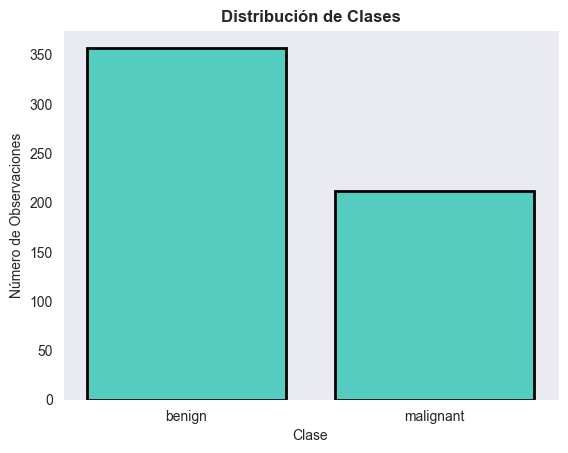

In [136]:
sns.set_style("dark")
sns.countplot(x=df['class'], color='turquoise', linewidth=2, edgecolor='black')
plt.title("Distribución de Clases", fontweight="bold")
plt.xlabel("Clase")
plt.ylabel("Número de Observaciones")
plt.show()

Existe un desbalance de clases. La clase de elementos benignos tiene casi un 75% más de elementos que la clase de malignos. Esto puede ocasionar que el modelo de máquina de soporte vectorial tenga deficiencias al momento de categorizar correctamente observaciones de la clase de malignos.

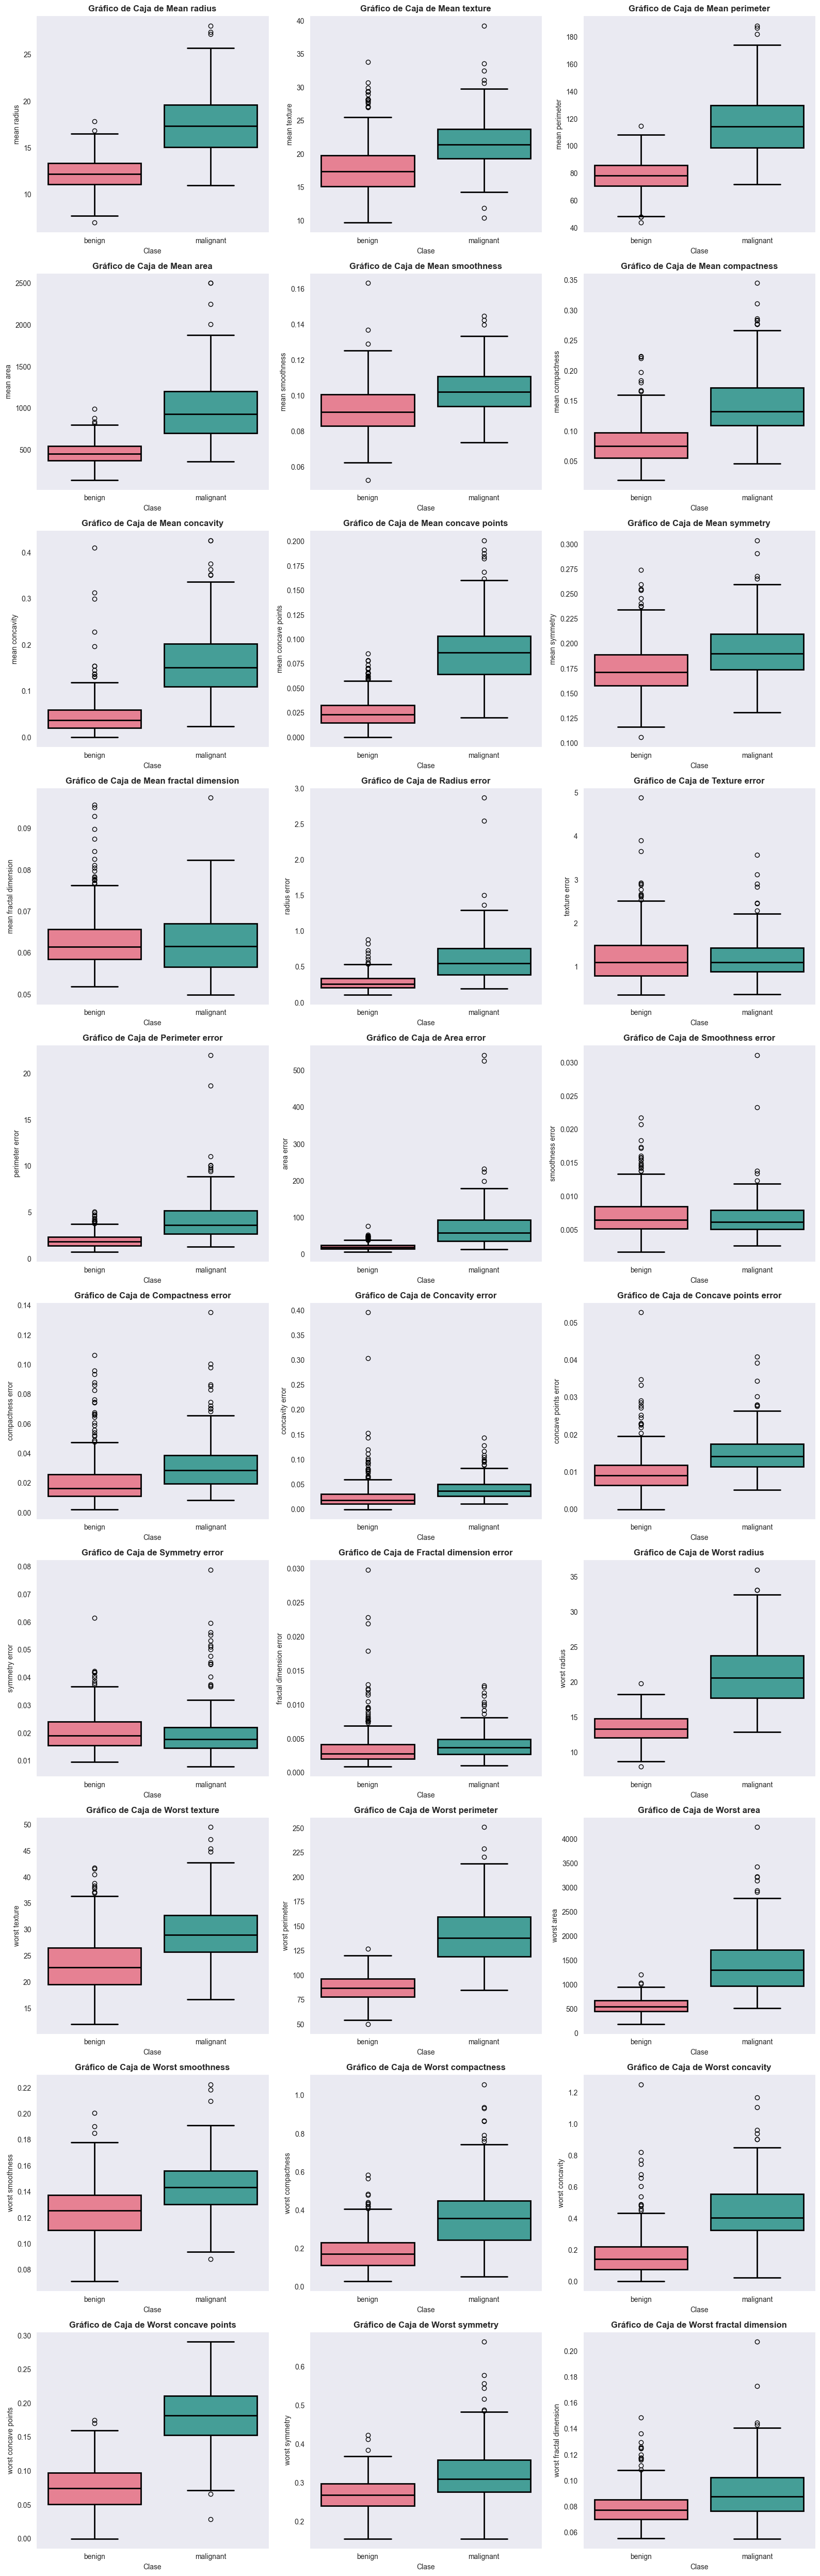

In [137]:
X = df.drop(columns=['target', 'class']) #Se omiten las 2 últimas columnas ya que estas son de clase
plt.figure(figsize=(16, 50))

for i, col in enumerate(X.columns, 1):
    
    plt.subplot(10, 3, i)
    sns.boxplot(x=df['class'], y=df[col], palette="husl", hue=df['class'], legend=False, linewidth=2, linecolor='black')
    plt.title(f'Gráfico de Caja de {col.capitalize()}', fontweight='bold')
    plt.xlabel('Clase')

plt.tight_layout()
plt.show()

Observando la dispersión de los datos en cada variable predictora para cada clase, se observa que las variables que parecen tener influencia significativa son: 

mean radius, mean texture, mean perimeter, mean area, mean compactness, mean concavity, mean concave points, radius error, perimeter error, area error, concave points error, worst radius, worst perimeter, worst area, worst compactness, worst concavity y worst concave points.

## ------------------------------------------------------------------------------------------------------

### **3. Preprocesamiento**
 - Escalamiento de características (StandardScaler)
 - División del conjunto en entrenamiento y prueba
 - usar hold-out de 70% y 30%



In [138]:
#Variables independientes más relevantes
X = X[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 
      'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 
      'concave points error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 
      'worst concavity', 'worst concave points']]

Y = df['class']

#set_output es para asegurar una visualización más amigable
scaler = StandardScaler().set_output(transform='pandas')
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=24)

#Se reinicia el contador de index para manipularlos más fácilmente
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

X_train

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,concave points error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,-1.341198,0.560905,-1.333287,-1.091251,-0.810194,-0.857873,-0.937589,0.090331,-0.052998,-0.333702,-0.506441,-1.122220,-1.147684,-0.916194,-0.858566,-1.011215,-1.171020
1,1.540126,0.912292,1.521194,1.476405,0.520389,1.215330,1.371746,0.741794,1.245963,0.654835,3.668187,0.942393,1.034724,0.760151,-0.081840,0.531141,1.033791
2,-0.078755,0.072221,-0.135476,-0.177157,-0.777787,-0.946385,-0.670364,-0.228362,-0.264871,-0.235574,-0.771654,-0.132365,-0.189474,-0.231136,-0.891646,-1.077804,-0.848216
3,-0.757549,-0.262877,-0.757036,-0.716114,-0.519289,-0.695035,-0.874394,-0.279252,-0.193586,-0.382985,-0.647077,-0.743259,-0.731874,-0.686963,-0.479427,-0.717654,-0.906230
4,1.611130,0.528326,1.554146,1.635674,0.497647,0.482119,0.979935,1.985527,1.792477,1.849528,0.863582,1.959169,1.877663,1.983658,0.440431,0.429434,1.026178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.632582,-1.079677,-0.570856,-0.631644,0.478696,-0.649083,-0.487226,-0.032382,0.076700,-0.336782,-0.112920,-0.645930,-0.625539,-0.652156,-0.016317,-0.853904,-0.825072
394,-0.624062,-1.950000,-0.652001,-0.603488,-0.983979,-0.787690,-0.798560,-0.552108,-0.602482,-0.470552,-0.967441,-0.511326,-0.584434,-0.511699,-0.615561,-0.579486,-0.698082
395,1.577048,0.556251,1.562384,1.533287,0.560187,1.224118,1.583257,0.784743,1.142006,0.601151,1.016059,1.342063,1.499383,1.159197,0.582290,0.965317,1.688535
396,-1.251733,-0.248914,-1.286742,-1.043186,-1.533193,-1.114873,-1.261820,-0.185052,-0.314869,-0.410268,-1.913447,-1.304866,-1.340697,-1.013934,-1.443878,-1.305831,-1.745063


Se enseña una pequeña muestra del conjunto de entrenamiento para verificar que se hayan estandarizado las columnas. La estandarización se logró con éxito.

## --------------------------------------------------------------------------

### **4. Aplicar Técnica CNN (Condensed Nearest Neighbor)**

- Aplicar CNN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [139]:
class CNN:
    """
    Condensed Nearest Neighbors (CNN) - versión adaptada para datos densos.

    Este algoritmo reduce el conjunto de entrenamiento reteniendo solo
    las instancias necesarias para preservar la capacidad de clasificación
    bajo la regla 1-NN (o k-NN si se ajusta n_neighbors).

    Basado en:
    P. E. Hart, The condensed nearest neighbor rule (1968).
    """

    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def select_data(self, X, y):
        # Validación de entrada: datos densos
        X, y = check_X_y(X, y, accept_sparse=False)

        idx_s = []  # índice de instancias seleccionadas
        classes = np.unique(y)
        self.classes_ = classes

        # Iniciar con una instancia aleatoria por clase
        for cur_class in classes:
            mask = np.where(y == cur_class)[0]
            choose_id = random.choice(mask)
            idx_s.append(choose_id)

        # Revisión aleatoria del resto de las instancias
        train_idx = list(range(len(y)))
        random.shuffle(train_idx)

        flag = True
        while flag:
            flag = False
            self.classifier.fit(X[idx_s], y[idx_s])
            for idx in train_idx:
                if idx not in idx_s:
                    x_i = X[idx].reshape(1, -1)
                    if self.classifier.predict(x_i) != [y[idx]]:
                        idx_s.append(idx)
                        self.classifier.fit(X[idx_s], y[idx_s])
                        flag = True

        self.X_ = X[idx_s]
        self.y_ = y[idx_s]
        self.sample_indices_ = sorted(idx_s)
        self.reduction_ = 1.0 - len(self.y_) / len(y)
        return self.X_, self.y_

In [140]:
cnn = CNN(n_neighbors=1)
X_train_cnn, Y_train_cnn = cnn.select_data(X_train, Y_train)

print(f"Instancias originales: {len(Y_train)}")
print(f"Instancias tras CNN:   {len(Y_train_cnn)}")
print(f"Reducción: {100 * cnn.reduction_:.2f}%")

Instancias originales: 398
Instancias tras CNN:   62
Reducción: 84.42%


CNN redujo bastante la cantidad de datos. Más adelante se sabrá si la calidad del entrenamiento con estos datos está a la altura de la reducción.

 --------------------------------------------------------------------------

### **5. Aplicar Técnica ENN (Edited Nearest Neighbor)**

- Aplicar ENN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [141]:
class ENN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def fit(self, X, y):
        # Validación inicial
        X, y = check_X_y(X, y, accept_sparse=False)

        mask = np.ones(len(y), dtype=bool)
        tmp_m = np.ones(len(y), dtype=bool)

        indices = list(range(len(y)))
        random.shuffle(indices)

        for i in indices:
            tmp_m[i] = False
            self.classifier.fit(X[tmp_m], y[tmp_m])
            x_i = X[i].reshape(1, -1)
            y_pred = self.classifier.predict(x_i)
            if y_pred[0] != y[i]:
                mask[i] = False
            tmp_m[i] = True

        self.X_ = X[mask]
        self.y_ = y[mask]
        self.sample_indices_ = np.where(mask)[0]
        self.reduction_ = 1 - len(self.y_) / len(y)
        return self

In [142]:
selector = ENN()
selector.fit(X_train, Y_train)

idx = selector.sample_indices_
X_train_clean, Y_train_clean = X_train.iloc[idx], Y_train.iloc[idx] #Como son dataframes hay que usar iloc para que seleccione las instancias con esos índices

print(f"Original: {len(Y_train)} muestras")
print(f"Limpio:   {len(Y_train_clean)} muestras")

Original: 398 muestras
Limpio:   383 muestras


Como la reducción es de apenas 15 elementos, se infiere que no hay mucho ruido / instancias con etiquetas conflictivas en los datos. 

## --------------------------------------------------------------------------

### **6. Aplicar Reducción Mediante K-Medias**
- Realizar agrupamiento por clase y representar cada grupo con su centroide. Elige la mitad de los elementos de cada clase como el valor del número de centroides
- Generar un nuevo conjunto reducido con los centroides como prototipos



In [143]:
#Se juntan las instancias de entrenamiento con sus respectivas etiquetas 
data = X_train
data = data.join(Y_train)
data['class'] = data['class'].replace({'malignant': 0, 'benign': 1})
data

C:\Users\pablo\AppData\Local\Temp\ipykernel_30372\1809618314.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class'] = data['class'].replace({'malignant': 0, 'benign': 1})
C:\Users\pablo\AppData\Local\Temp\ipykernel_30372\1809618314.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['class'] = data['class'].replace({'malignant': 0, 'benign': 1})


,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,concave points error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,class
0,-1.341198,0.560905,-1.333287,-1.091251,-0.810194,-0.857873,-0.937589,0.090331,-0.052998,-0.333702,-0.506441,-1.122220,-1.147684,-0.916194,-0.858566,-1.011215,-1.171020,1
1,1.540126,0.912292,1.521194,1.476405,0.520389,1.215330,1.371746,0.741794,1.245963,0.654835,3.668187,0.942393,1.034724,0.760151,-0.081840,0.531141,1.033791,0
2,-0.078755,0.072221,-0.135476,-0.177157,-0.777787,-0.946385,-0.670364,-0.228362,-0.264871,-0.235574,-0.771654,-0.132365,-0.189474,-0.231136,-0.891646,-1.077804,-0.848216,1
3,-0.757549,-0.262877,-0.757036,-0.716114,-0.519289,-0.695035,-0.874394,-0.279252,-0.193586,-0.382985,-0.647077,-0.743259,-0.731874,-0.686963,-0.479427,-0.717654,-0.906230,1
4,1.611130,0.528326,1.554146,1.635674,0.497647,0.482119,0.979935,1.985527,1.792477,1.849528,0.863582,1.959169,1.877663,1.983658,0.440431,0.429434,1.026178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.632582,-1.079677,-0.570856,-0.631644,0.478696,-0.649083,-0.487226,-0.032382,0.076700,-0.336782,-0.112920,-0.645930,-0.625539,-0.652156,-0.016317,-0.853904,-0.825072,1
394,-0.624062,-1.950000,-0.652001,-0.603488,-0.983979,-0.787690,-0.798560,-0.552108,-0.602482,-0.470552,-0.967441,-0.511326,-0.584434,-0.511699,-0.615561,-0.579486,-0.698082,1
395,1.577048,0.556251,1.562384,1.533287,0.560187,1.224118,1.583257,0.784743,1.142006,0.601151,1.016059,1.342063,1.499383,1.159197,0.582290,0.965317,1.688535,0
396,-1.251733,-0.248914,-1.286742,-1.043186,-1.533193,-1.114873,-1.261820,-0.185052,-0.314869,-0.410268,-1.913447,-1.304866,-1.340697,-1.013934,-1.443878,-1.305831,-1.745063,1


In [144]:
data['class'].value_counts()

class
1    251
0    147
Name: count, dtype: int64

Se hizo un join de tablas de los datos de entrenamiento para que mostraran sus atributos y etiquetas en un solo DataFrame.

In [145]:
classes = data['class'].unique()
prototypes = []
labels = []

for c in classes:

    class_data = data[data['class'] == c]

    if c == 1:
        kmeans = KMeans(n_clusters=251 // 2, random_state=42)
    else:
        kmeans = KMeans(n_clusters=147 // 2, random_state=42) 
    
    kmeans.fit(class_data)

    prototypes.append(kmeans.cluster_centers_)
    
    if c == 1:
        labels.extend([c] * (251 // 2))
    else:
        labels.extend([c] * (147 // 2))

X_proto = np.vstack(prototypes)
Y_proto = np.array(labels)

 --------------------------------------------------------------------------

### **7. Entrenar SVM sobre cada Conjunto Reducido**
- Entrenar un modelo SVM (SVC) sobre:
 * los datos originales
 * datos reducidos con CNN
 * datos reducidos con ENN
 * datos reducidos con K-medias
- Evaluar cada modelo con accuracy, F1-score



**Datos Originales**

Accuracy: 0.9573101265822783
              precision    recall  f1-score   support

      benign       0.96      0.97      0.97       106
   malignant       0.95      0.94      0.95        65

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



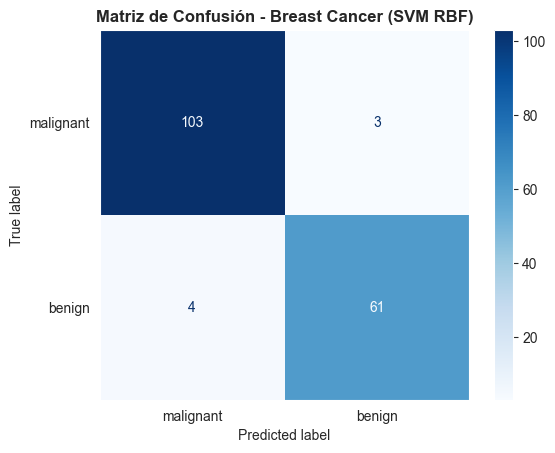

In [147]:
pipeline = Pipeline([
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(pipeline, X_train, Y_train, cv=cv, scoring='accuracy')
print("Accuracy:", np.mean(accuracy_scores))

Y_pred = cross_val_predict(pipeline, X_test, Y_test, cv=cv)

print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['class'].unique())
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)", fontweight="bold")
plt.grid(False)
plt.show()

**Datos Reducidos con CNN**

Accuracy: 0.7743589743589744
              precision    recall  f1-score   support

      benign       0.96      0.97      0.97       106
   malignant       0.95      0.94      0.95        65

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



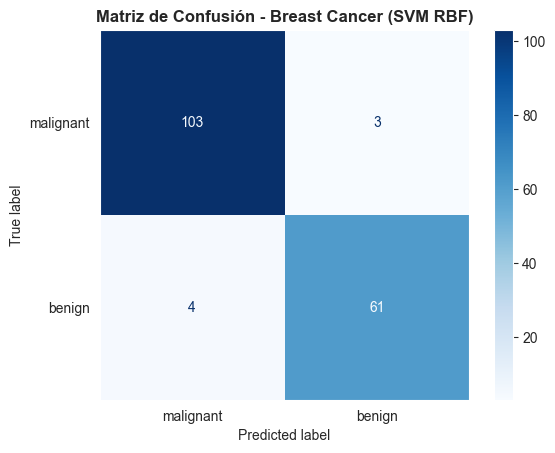

In [149]:
accuracy_scores = cross_val_score(pipeline, X_train_cnn, Y_train_cnn, cv=cv, scoring='accuracy')
print("Accuracy:", np.mean(accuracy_scores))

Y_pred = cross_val_predict(pipeline, X_test, Y_test, cv=cv)

print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['class'].unique())
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)", fontweight="bold")
plt.grid(False)
plt.show()

**Datos Reducidos con ENN**

Accuracy: 0.9739234449760765
              precision    recall  f1-score   support

      benign       0.96      0.97      0.97       106
   malignant       0.95      0.94      0.95        65

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



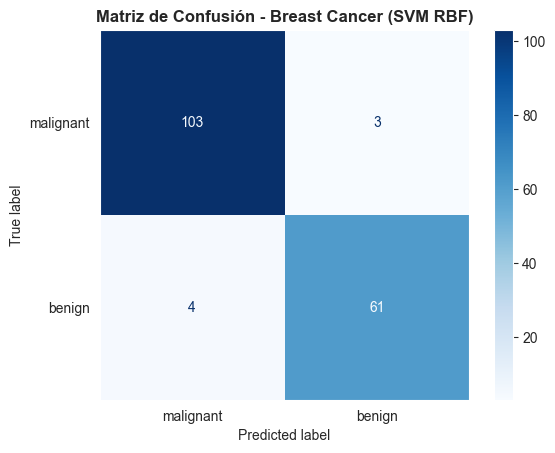

In [150]:
accuracy_scores = cross_val_score(pipeline, X_train_clean, Y_train_clean, cv=cv, scoring='accuracy')
print("Accuracy:", np.mean(accuracy_scores))

Y_pred = cross_val_predict(pipeline, X_test, Y_test, cv=cv)

print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['class'].unique())
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)", fontweight="bold")
plt.grid(False)
plt.show()

**Datos Reducidos con K-Medias**

Accuracy: 0.97
              precision    recall  f1-score   support

      benign       0.96      0.97      0.97       106
   malignant       0.95      0.94      0.95        65

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



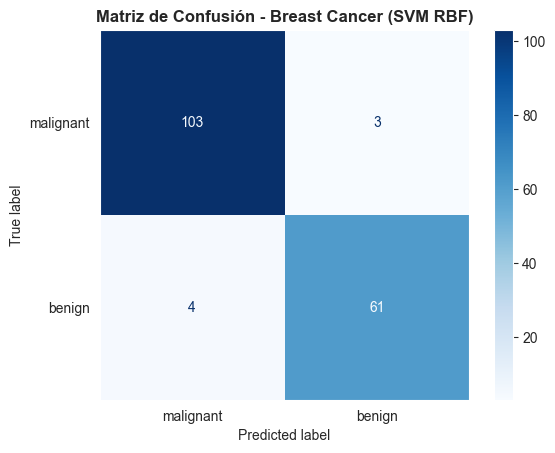

In [152]:
accuracy_scores = cross_val_score(pipeline, X_proto, Y_proto, cv=cv, scoring='accuracy')
print("Accuracy:", np.mean(accuracy_scores))

Y_pred = cross_val_predict(pipeline, X_test, Y_test, cv=cv)

print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['class'].unique())
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)", fontweight="bold")
plt.grid(False)
plt.show()

## --------------------------------------------------------------------------

### 📊 **8. Comparar los Resultados y Reflexión Final**
- Comparar las métricas de rendimiento obtenidas con cada técnica
- Escribe tus conclusiones sobre el impacto de la reducción de la numerosidad
- ¿Cuál técnica funcionó mejor? ¿Qué ventajas y desventajas observaste?



Se obtuvieron exactamente los mismos resultados en cada uno de los 4 modelos de SVM. No sé si quizás haya tenido impacto el que se hayan usado las 17 características que más impacto tenían, en lugar de usar todas las 30. Cualquier error que tenga en mi código, profesor, hágamelo saber en los comentarios de Campus Virtual al momento de calificar la práctica.

En todo caso, la reducción de la numerosidad sí ofreció alternativas para obtener los mismos resultados pero conjunto de datos más reducidos, ahorrando recursos computacionales. Con datasets de mayor tamaño serán más visibles las bondades que puede tener la reducción de la numerosidad.